In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [88]:
N = 10**4
truth = np.random.normal(2, 1, N) #particle level data
gen = np.random.normal(0, 1, N) #particle level simulation

def g(x, mu, sigma): #reweighting function
    return sp.norm.pdf(x, mu, sigma, N)/sp.norm.pdf(x) #we want that predicted_truth = gen * g

g_times_gen = lambda mu, sigma: np.random.normal(mu, sigma, N)

In [89]:
#So we want to minimize the wasserstein distance between truth and g*gen
Mu = np.linspace(-4, 4, 100)
Sigma = np.linspace(0.1, 2, 100)
losses = np.zeros((Mu.shape[0], Sigma.shape[0]))
for idm, mu in enumerate(Mu):
    for ids, sigma in enumerate(Sigma):
        losses[idm, ids] = sp.wasserstein_distance(truth, g_times_gen(mu, sigma))

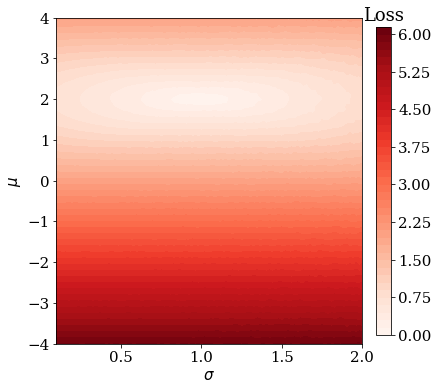

In [92]:
X,Y = np.meshgrid(Sigma,Mu)
Z = losses

plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"


fig, ax = plt.subplots(figsize=(6,6))


ax.set_xlabel('$\sigma$')
ax.set_ylabel('$\mu$')
cf = ax.contourf(X,Y,Z,50, cmap='Reds')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

plt.show()